# This code:
- Makes a stratigraphic chart of the initial and boundary conditions imposed in Wang's models
- Plots the initial and boundary conditions imposed in Wang's models as a map

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Stratigraphic chart 

In [2]:
path=''

#Loading time scale
SeriesEpoch=pd.read_table('Series_epoch_boundaries.csv', sep=',')

# Sea-level
#https://www.science.org/doi/10.1126/sciadv.aaz1346
Miller=pd.read_csv('Miller_et_al_2020_sea_level.csv',header=0) 

#Climatic isotopic records
#https://www.science.org/doi/10.1126/science.1059412
Zachos=pd.read_csv('zachos_291121.csv', sep=',', header=0)


# Temperature - Cramer
#https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2011JC007255
temp=pd.read_csv('Miller_Temperature.txt', sep='\t', header=0)



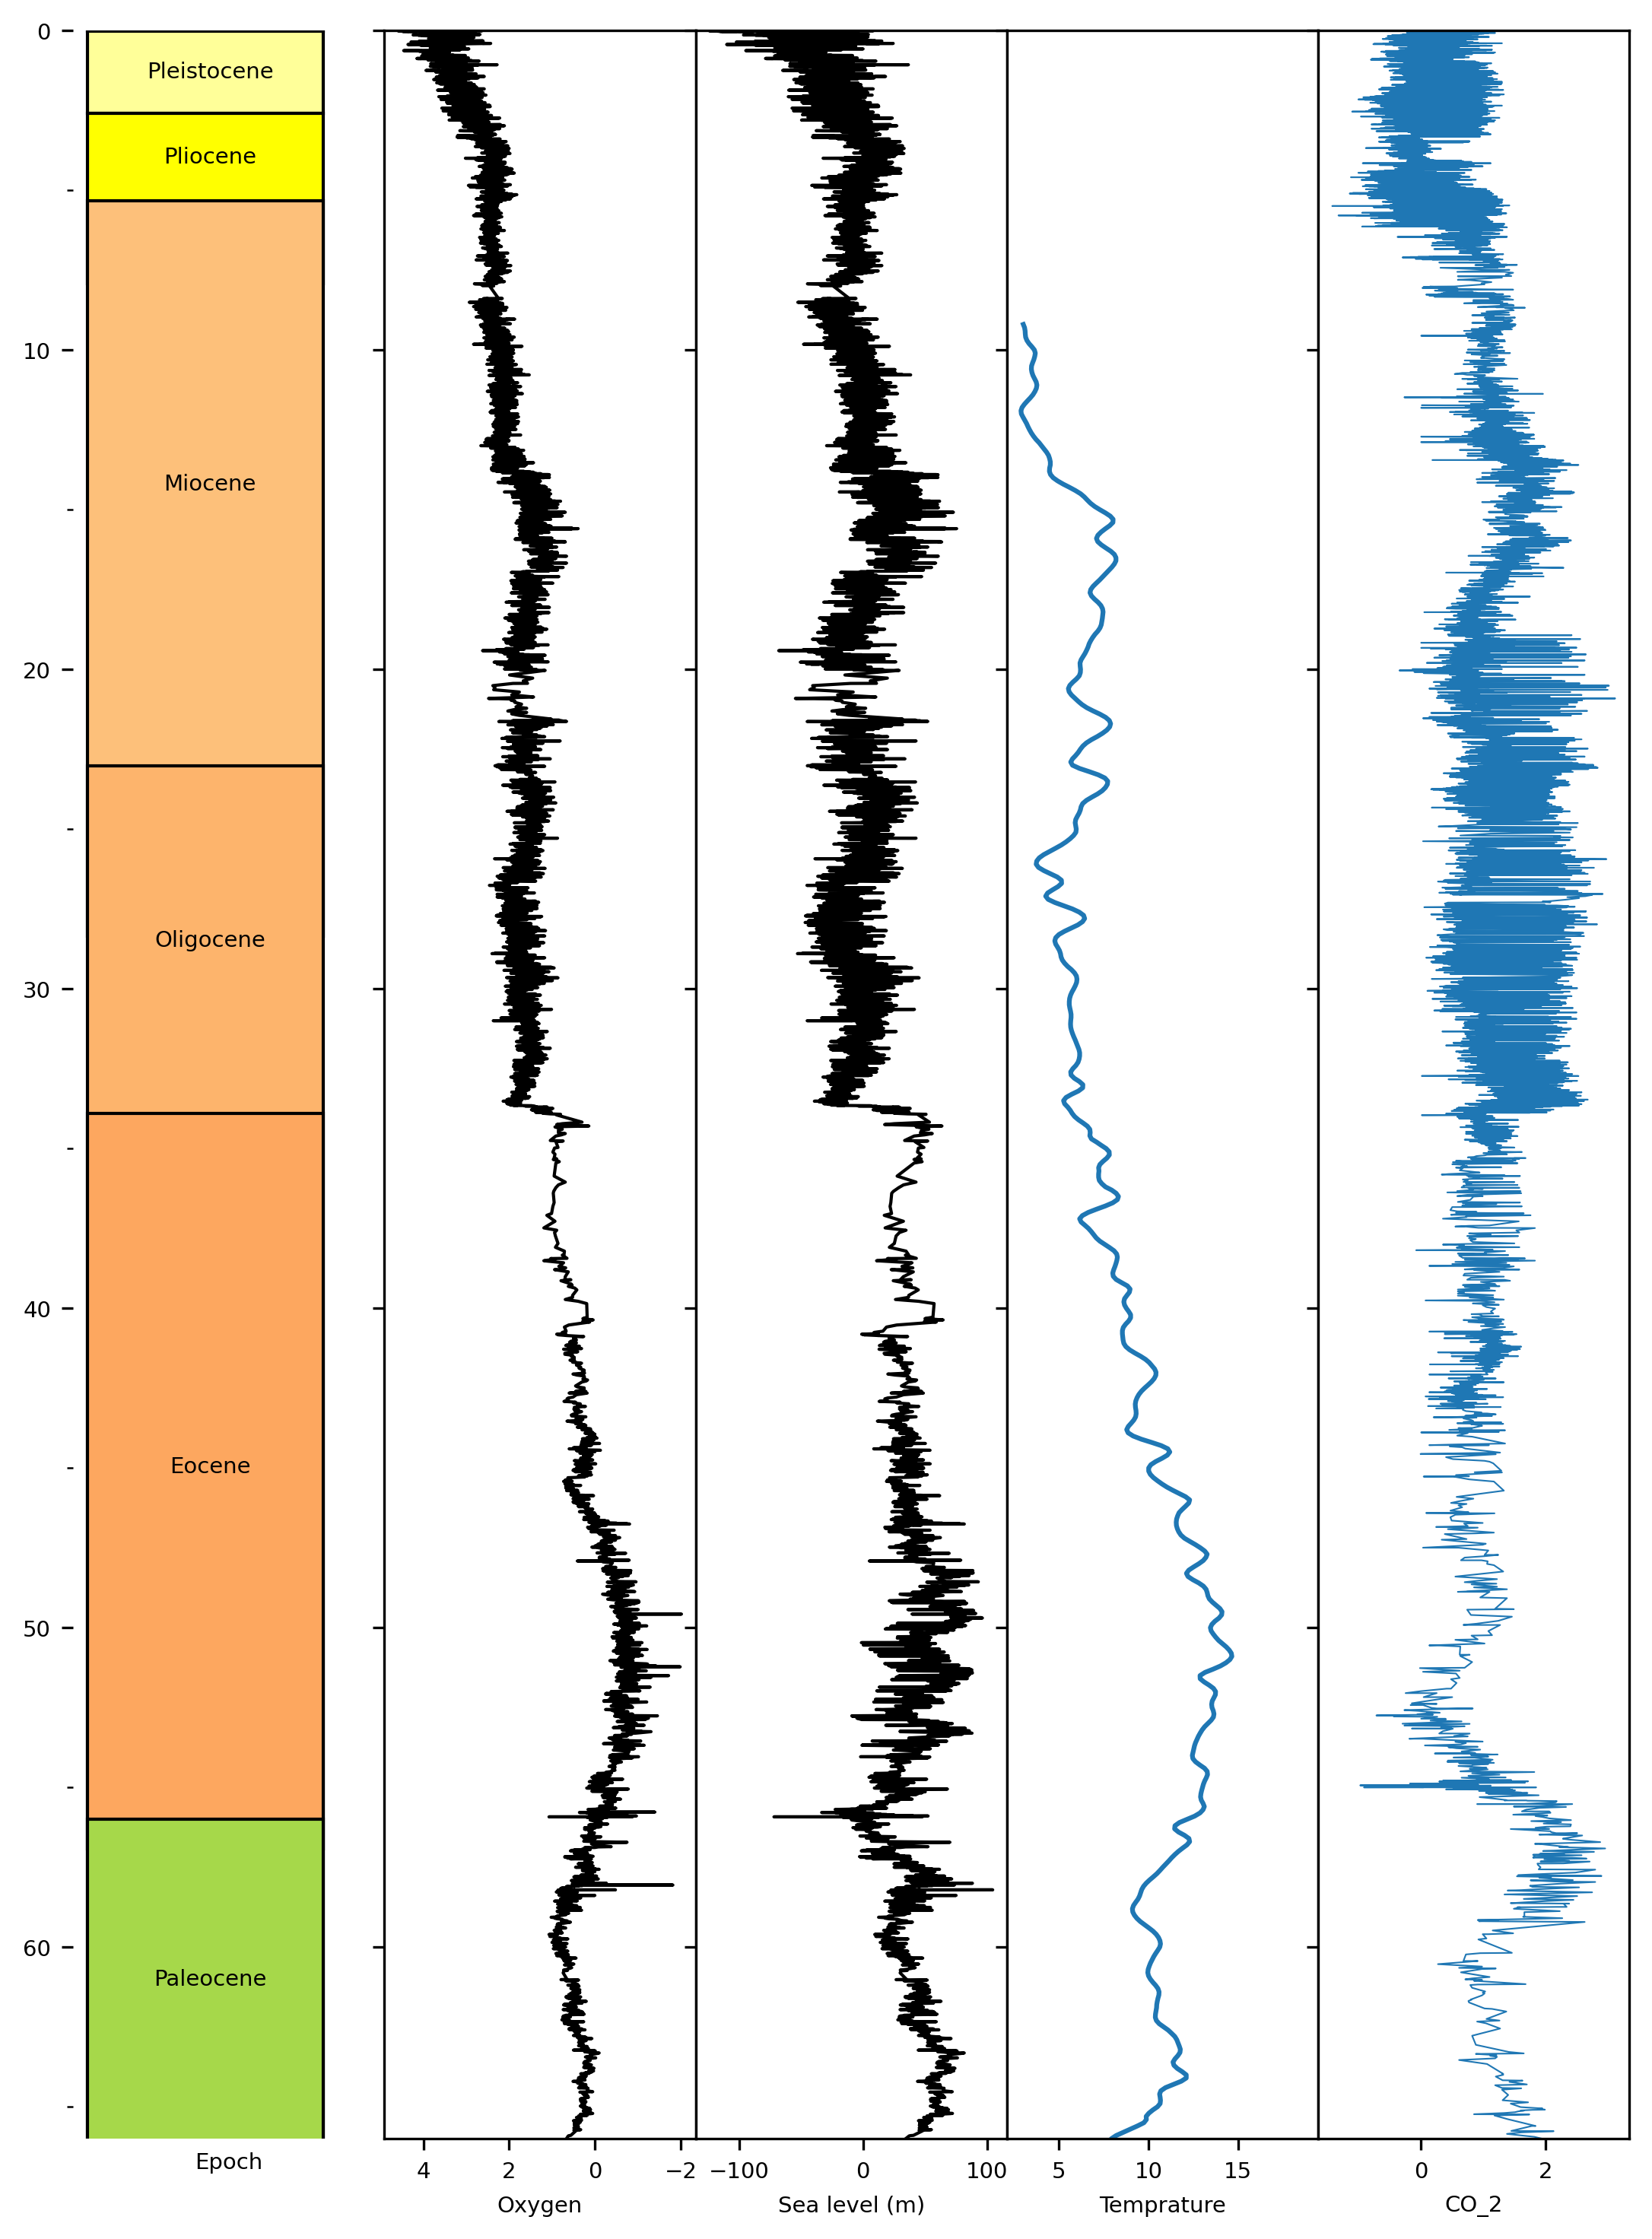

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22/2.5,30/2.5), sharey=True, dpi=300)#constrained_layout=True
plt.rc("font", size=7); plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42


vertmax=int(SeriesEpoch.Series_epoch_value[SeriesEpoch.Series_epoch_name=='L Cretaceous'])
vertdiff=10
v=0
vtext=13
v3=25
c=20
c2=30
r=26

#####################
#Ploting Epoch boxes#
#####################
ax1=plt.subplot2grid((1,5),(0,0), colspan=1, rowspan=5)

ax1.plot(np.linspace(0,c2,5), np.linspace(0,vertmax,5), alpha=0)
for k in np.arange(1,int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0])+1,1):
    rect=Rectangle((v, SeriesEpoch.Series_epoch_value[k-1]), 
                       v3,SeriesEpoch.Series_epoch_value[k],
                facecolor=(SeriesEpoch.rse[k]/255, SeriesEpoch.gse[k]/255, SeriesEpoch.bse[k]/255,1), zorder=1, edgecolor='k')
    #plt.gca().add_patch(rect)
    ax1.add_patch(rect)
    
    if k<int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0]):
        ax1.text(vtext,((SeriesEpoch.Series_epoch_value [k+1]+SeriesEpoch.Series_epoch_value [k])/2), 
                 SeriesEpoch.Series_epoch_name[k], verticalalignment='center', horizontalalignment='center')#,, rotation=90 verticalalignment='bottom'
    '''
    if k==int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0]):
        ax1.text(vtext,SeriesEpoch.Series_epoch_value [k]+2, 
             SeriesEpoch.Series_epoch_name[k], verticalalignment='top', horizontalalignment='center')#,, rotation=90 verticalalignment='bottom'
    '''
ax1.invert_yaxis()
ax1.set_ylim(vertmax,0)
ax1.set_xlabel('Epoch')


###################
#Ploting Oxygen level#
###################
#Color code green house and ice house portion?
ax2=plt.subplot2grid((1,5),(0,1), colspan=1, rowspan=5)
# plt.plot(Miller.sea_level_m, Miller.age_ka/1e3, color='k')
ax2.plot(Miller.oxygen, Miller.age_ka/1e3, color='k', linewidth=1 )
ax2.set_xlabel('Oxygen')
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_ylim(vertmax,0)




###################
#Ploting sea level#
###################
ax3=plt.subplot2grid((1,5),(0,2), colspan=1, rowspan=5)
ax3.plot(Miller.sea_level_m, Miller.age_ka/1e3, color='k', linewidth=1)
ax3.set_xlabel('Sea level (m)')
ax3.set_ylim(vertmax,0)
#ax3.invert_yaxis()  # the sea level was inverted already, therefore, no need to invert it again.


####################
#Ploting Temprature#
####################
ax4=plt.subplot2grid((1,5),(0,3), colspan=1, rowspan=5)
ax4.plot(temp.Temperature,temp.Age)
ax4.set_xlabel('Temprature')
ax4.invert_yaxis()
ax4.set_ylim(vertmax,0)



####################
#Ploting CO2       #
####################
ax5=plt.subplot2grid((1,5),(0,4), colspan=1, rowspan=5)
ax5.plot( Zachos.d13C, Zachos.Age_Ma, linewidth=0.5)
ci = 0.1 * np.std(Zachos.d13C) / np.mean(Zachos.d13C)
ax5.fill_between(Zachos.d13C-ci, (y-ci), (y+ci), color='blue', alpha=0.5)
ax5.set_xlabel('CO_2')
ax5.invert_yaxis()
ax5.set_ylim(vertmax,0)

hide_tick_labels = True
if hide_tick_labels :
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    ax4.set_yticklabels([])
    ax5.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_xticks([])




ax1.set_yticks(np.arange(0,vertmax,5), minor=True)
#ax1.set_yticklabels(np.arange(0,vertmax,10), minor=True)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)



# plt.tight_layout(0)
# plt.savefig(path+'/Documents/1.Projects/NA_drainage/Strat_chart.jpg' , dpi=300)

#Add sediment supply and tectonic+ climatic + geodynamic events + drainage evolution events + model inputs+
#add tectonic + catchment sizes from BLum Geosphere
pass

plt.subplots_adjust(wspace=0)

# plt.savefig(path+'/Documents/1.Projects/NA_drainage/Strat_chart.pdf' , dpi=300)


In [36]:
Zachos



,SITE,Age_Ma,Genus,d18O,d13C,d18O_5pt,d13C_5pt
0,607,0.0020,CIB,3.16,0.96,3.252,0.72
1,607,0.0040,CIB,3.33,0.88,3.228,0.67
2,607,0.0059,CIB,3.66,0.70,3.320,0.38
3,806,0.0070,CIB,2.97,0.27,3.360,0.34
4,849,0.0080,CIB,3.71,0.06,3.244,0.20
...,...,...,...,...,...,...,...
10943,738,66.2961,NUT,-0.04,1.50,1.010,1.85
10944,527,66.3037,NUT,1,2.03,0.786,1.82
10945,527,66.3159,NUT,1.02,1.70,0.780,1.69
10946,384,66.3800,GAVNUT,0.62,2.01,1.050,1.65


In [18]:
np.arange(0,vertmax,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65])